## Assignment

You will be asked to work with NOAA climate data: <a href="https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.html" target="_blank">temperature</a> and <a href="https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html" target="_blank">precipitation</a> for various months and years of data for  Boulder, Colorado, provided by the U.S. National Oceanic and Atmospheric Administration (NOAA).

In your home directory, you will need a subdirectory called `earth-analytics-bootcamp` that has a subdirectory called `data`. 

### Question 1: Import Python Packages

In the questions below, you will need to import the necessary `Python` packages to accomplish the following tasks: 

1. Set your working directory to `earth-analytics-bootcamp` in your home directory.
2. Download a CSV file using `urllib.request`.
3. Import data into `pandas dataframes`.
4. Creating plots of your data using `matplotlib`.

In [1]:
# Import necessary Python packages

# BEGIN SOLUTION
import os
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

# END SOLUTION

### DO NOT REMOVE LINES BELOW ###
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts

### Question 2: Download Data and Plot

Set your working directory to `earth-analytics-bootcamp` and use `.urllib.request` to download the following .csv file to your `data` subdirectory:

* `boulder-precip-2007-to-2017-months-seasons.csv` from `https://ndownloader.figshare.com/files/12767933`
    * This dataset contains a row for each month (starting with January through December) and contains a column for each year (2007 to 2017). 
    
Import the data to a `pandas dataframe` and create a line plot for **2007** using `matplotlib`. 

Be sure to include:
1. An appropriate plot title.
2. Clear labels for the axes (including units of measurements where apppropriate).

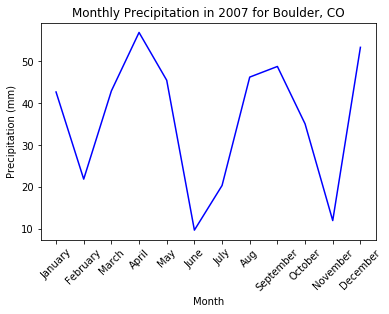

In [2]:
# Create plot for 2007

# BEGIN SOLUTION

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics-bootcamp'))

# Download the monthly average precipitation values
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12767933", 
                           filename = "data/boulder-precip-2007-to-2017-months-seasons.csv")

# Import to pandas dataframe
precip_2007_to_2017_months = pd.read_csv("data/boulder-precip-2007-to-2017-months-seasons.csv")

fig, ax = plt.subplots()

# Add the x-axis and the y-axis to the plot
ax.plot(precip_2007_to_2017_months.months, precip_2007_to_2017_months.y2007, color="blue")

# Set plot title
ax.set(title="Monthly Precipitation in 2007 for Boulder, CO")

# Add labels to the axes
ax.set(xlabel="Month", ylabel="Precipitation (mm)")
    
# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45);

# END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ts_1_plot = nb.convert_axes(plt)

In [3]:
def run_test(func, points, *args, correct_message="default correct", error_message="default error", **kwargs):
    results = {"points": 0, "pass": False}
    score = 0
    try:
        fname = func.__name__
        results['description'] = fname
        func(*args, **kwargs)
    except Exception as e:
        results['message'] = error_message
        results['traceback'] = e
        pass
    else:
        results['pass'] = True
        results['message'] = correct_message
        results['points'] = points
    
    return results
   
def output_results(results):
    points = 0
    for r in results:
        points += r['points']
        print("Results for test '{}':".format(r['description']))
        if (r['pass']):
            print(" Pass! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
        else:
            print(" Fail! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
            print(" Traceback: {t}".format(t=r['traceback']))
    return points

In [4]:
# Locked Grading Cell - Homework Plot 1
hw_plot1 = ts.TimeSeriesTester(ts_1_plot)

results = []

plot_type_test = run_test(hw_plot1.assert_plot_type, 3, 'line', 
             correct_message="Your plot is indeed a line plot.",
             error_message="Check that your plot is a line plot.")
results.append(plot_type_test)

plot_x_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="x", lst=["Month"],
                  correct_message="Your x axis label appropriately contains the word Month",
                  error_message="Check your x axis label for a more appropriate label")
results.append(plot_x_lab_test)

plot_y_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="y", lst=["Precip", "mm"], 
                  correct_message="Your y axis label appropriately contains the word 'Precip' and identifies the units",
                  error_message="Check your y axis label for a more appropriate label with units identified.")
results.append(plot_y_lab_test)

plot_title_test = run_test(hw_plot1.assert_title_contains, 2, ["Month", "Precip", "2007"],
                   correct_message="Plot title appropriately contains the words 'Month', 'Precip', and '2007'",
                   error_message="Check your plot title words for a more appropriate title.")
results.append(plot_title_test)

output_results(results)

Results for test 'assert_plot_type':
 Pass! Your plot is indeed a line plot. (3 points)
Results for test 'assert_axis_label_contains':
 Pass! Your x axis label appropriately contains the word Month (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your y axis label appropriately contains the word 'Precip' and identifies the units (2 points)
Results for test 'assert_title_contains':
 Pass! Plot title appropriately contains the words 'Month', 'Precip', and '2007' (2 points)


9

In [5]:
### BEGIN HIDDEN TESTS

# Add test to ensure the df has the correct values
data_test = run_test(hw_plot1.assert_xydata, 6, xy_expected=precip_2007_to_2017_months,
                correct_message="Plot includes correct data",
                error_message="Check your plot data.",
                xcol="months",
                ycol="y2007")

results.append(data_test)

output_results(results)

### END HIDDEN TESTS

Results for test 'assert_plot_type':
 Pass! Your plot is indeed a line plot. (3 points)
Results for test 'assert_axis_label_contains':
 Pass! Your x axis label appropriately contains the word Month (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your y axis label appropriately contains the word 'Precip' and identifies the units (2 points)
Results for test 'assert_title_contains':
 Pass! Plot title appropriately contains the words 'Month', 'Precip', and '2007' (2 points)
Results for test 'assert_xydata':
 Fail! Check your plot data. (0 points)
 Traceback: Incorrect data values


9